# Machine Learning Project, classifying emojis!

<img src="img/sample-emojis.png"/>

#### Run the code cell below to import the necessary packages

In [4]:
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing

# Matplotlib might complain that a lot of figures are open, but suppress that warning.
plt.rcParams.update({'figure.max_open_warning': 0})

**Run the code cell below** to define some utility functions for fetching data and for processing images.

In [5]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

def rgba_to_rgb(image):
    """
    Converts image from RGBA format (H,W,4) to RGB format (H,W,3).
    Returns the new RGB image.
    """
    assert image.ndim == 3, "Expected 3-dimensional array"
    assert image.shape[2] == 4, "Expected 4 colour channels"
    rgb, a = np.split(image, [3], axis=2)  # Split into (H,W,3) and (H,W,1)
    return a*rgb + (1-a)                   # Apply alpha blending to get RGB

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q1 &mdash; Download emoji metadata and images

The image data and corresponding metadata that you need is available from [github.com/imcal/emoji-data](https://github.com/iamcal/emoji-data), where you can also find a description of the data. The specific files you'll need are only:
* *emoji.json*
* *sheets-clean/sheet_{vendor}_{size}_clean.png*

where *{vendor}* is one of *{apple, facebook, google, twitter}* and *{size}* is the pixel resolution. You'll need emojis from all four vendors, but only the small *16x16* pixel versions (to make training faster). However, do NOT download the files manually.

<div style="border-bottom: 1px solid black;"></div>

### *Q1a &mdash;  Write code to download the files*

Use the *download* function defined above to fetch the five files *procedurally*. 

*Hint:* When you visit a Github URL in your browser, Github normally returns an HTML file for rendering in your web browser. To ask Github for an actual raw file (instead of the web page for displaying that file) you must use special URLs. If you view a file in your web browser https://github.com/iamcal/emoji-data/{path_to_file} then you should use URL https://github.com/iamcal/emoji-data/raw/master/{path_to_file}.

In [6]:
# Feel free to define global variables like EMOJI_SIZE=16 for later use.
download('https://github.com/iamcal/emoji-data/raw/master/emoji.json','emoji.json')
size = [16, 20, 32, 64]
vendors = ['apple','facebook','google','twitter']
EMOJI_SIZE = 16
for vendor in vendors:
    download('https://github.com/iamcal/emoji-data/sheets-clean/raw/master/sheet_%s_%d_clean.png'%(vendor,EMOJI_SIZE),
             'sheet_%s_%d_clean.png'%(vendor,EMOJI_SIZE))

<div style="border-bottom: 1px solid black;"></div>

### *Q1b &mdash;  Load and inspect the emoji metadata*

The emoji metadata is contained in a JSON file, which Python's **[json](https://docs.python.org/3/library/json.html)** module can easily load and parse for you.

**Write code** to load the *emoji.json* file, then display the metadata for the first emoji (index 0) so that you can see an example. It should have short name '*hash*'.

In [7]:
# Keep the metadata in a global variable that you can keep referring to.
f = open('emoji.json') 
metadata = json.load(f) 
print(metadata[0])

{'name': 'HASH KEY', 'unified': '0023-FE0F-20E3', 'non_qualified': '0023-20E3', 'docomo': 'E6E0', 'au': 'EB84', 'softbank': 'E210', 'google': 'FE82C', 'image': '0023-fe0f-20e3.png', 'sheet_x': 0, 'sheet_y': 0, 'short_name': 'hash', 'short_names': ['hash'], 'text': None, 'texts': None, 'category': 'Symbols', 'sort_order': 135, 'added_in': '0.6', 'has_img_apple': True, 'has_img_google': True, 'has_img_twitter': True, 'has_img_facebook': False}


**Write code** to find the index of the emoji having short name *'laughing'*, then display its metadata (the *dict* object). Do not use the *sort_order* field of the emoji metadata, it is not relevant to this assignment.

In [8]:
# Your answer here. Aim for 1-5 lines. Keep the index in a global variable for later.
for emoji in metadata:
    if emoji['short_name']=='laughing':
        print(emoji)
        break

print('index = %d'%(metadata.index(emoji)))

{'name': 'SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES', 'unified': '1F606', 'non_qualified': None, 'docomo': 'E72A', 'au': 'EAC5', 'softbank': None, 'google': 'FE332', 'image': '1f606.png', 'sheet_x': 30, 'sheet_y': 38, 'short_name': 'laughing', 'short_names': ['laughing', 'satisfied'], 'text': None, 'texts': [':>', ':->'], 'category': 'Smileys & Emotion', 'sort_order': 5, 'added_in': '0.6', 'has_img_apple': True, 'has_img_google': True, 'has_img_twitter': True, 'has_img_facebook': True}
index = 1068


<div style="border-bottom: 1px solid black;"></div>

### *Q1c &mdash;  Load and inspect the emoji image data*

The emoji image data is contained in PNG files, which Matplotlib's **[imread](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imread.html)** function can load as a Numpy array. The image format is RGBA (*red*, *green*, *blue*, *alpha*) where *alpha* determines the opacity of each pixel.

**Write code** to load the four emoji sheet images. The list of images should be in order *{apple,facebook,google,twitter}*.

In [9]:
images =[]
for vendor in vendors:
     images.append(mpl.pyplot.imread('sheet_%s_%d_clean.png'%(vendor,EMOJI_SIZE), format='PNG'))

**Write code** to plot each vendor's sheet image. Generate four separate plots, where the title of each plot should be "*vendor* (*height*, *width*, *channels*)" where *height* and *width* are the size of the sheet and *channels* is the number of colour channels. Use the *figsize* argument of Matplotlib's *figure* function to enlarge the figures.


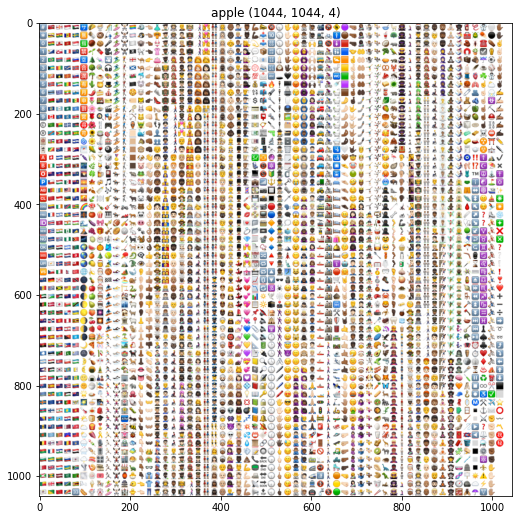

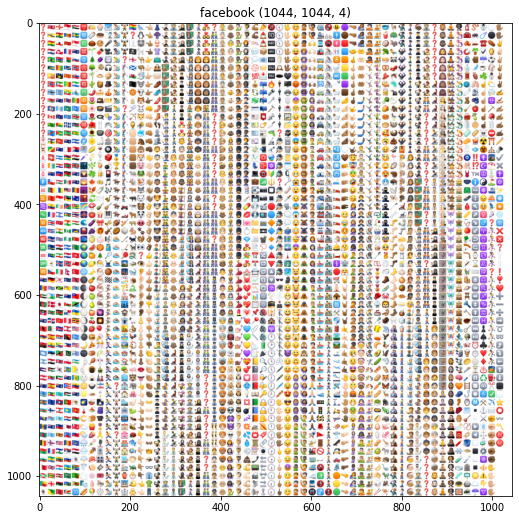

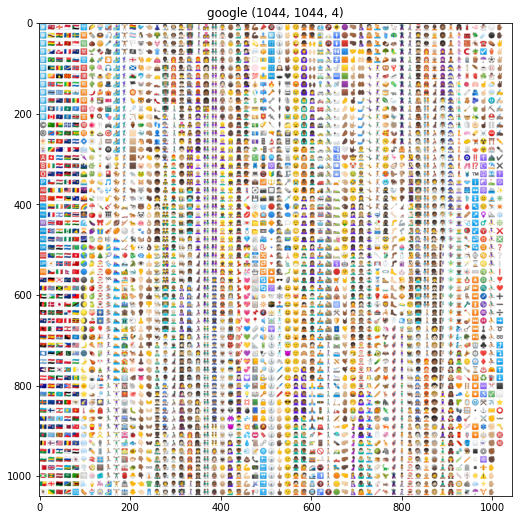

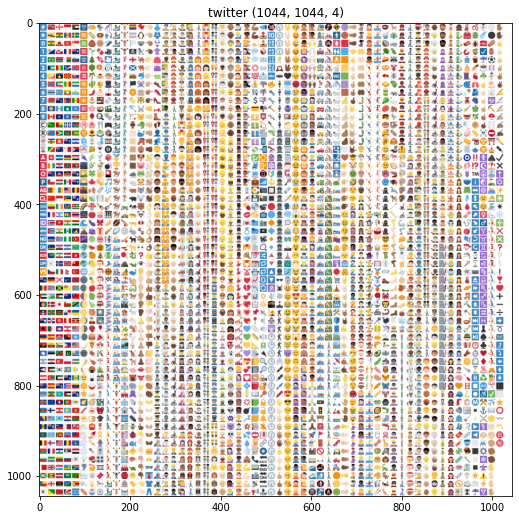

In [10]:
## Your answer here. Aim for 4-6 lines.
for i in range(len(images)):
    plt.figure(figsize=(25,40));
    plt.subplot(4,1,i+1)
    plt.imshow(images[i])
    plt.title('%s (%d, %d, %d)'%(vendors[i],images[i].shape[0],images[i].shape[1],images[i].shape[2]))

**Write code** to generate the same four plots as above, except use Numpy slicing to display only the first 3 rows and 8 columns of the sheet. To ensure you do not crop any emojis, take note of any "padding" between the 16x16 emojis in the sheet.

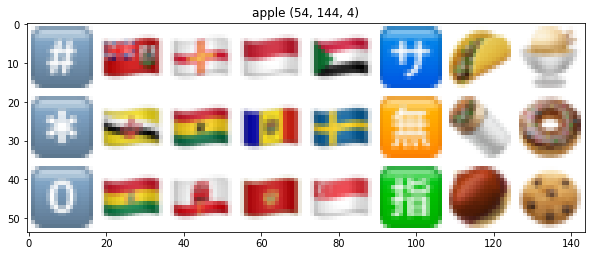

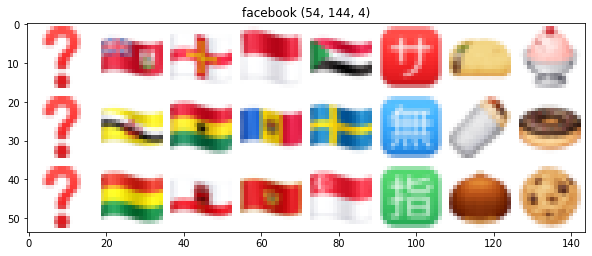

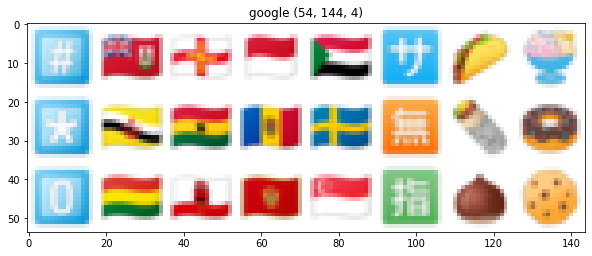

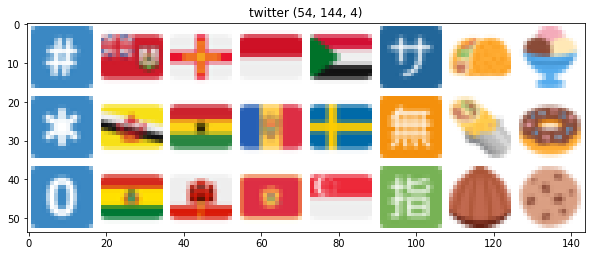

In [12]:
# Your answer here. Aim for 5-9 lines.
padding = 2
r = (EMOJI_SIZE + padding) * 3
c = (EMOJI_SIZE + padding) * 8
for i in range(len(images)):
    sliced_image = images[i][:r,:c]
    plt.figure(figsize=(10,25));
    plt.subplot(4,1,i+1)
    plt.imshow(sliced_image)
    plt.title('%s (%d, %d, %d)'%(vendors[i],sliced_image.shape[0],sliced_image.shape[1],sliced_image.shape[2]))

**Implement *get_emoji_image*.** It should extract a 16x16 RGBA emoji image by its style index (0=*apple*, 1=*facebook*, 2=*google*, 3=*twitter*) and emoji index (as they appear in *emoji.json*). Internally, your function may refer to any global variables you have already defined (metadata, images, size, padding). Use the *sheet_x* and *sheet_y* fields of the metadata. Use slicing and avoid for-loops. <span style="color:#080;font-weight:bold"></span>

In [13]:
def get_emoji_image(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    
    sheet_x = metadata[emoji_index].get('sheet_x')     #getting column index of each emoji in metadata
    sheet_y = metadata[emoji_index].get('sheet_y')     #getting row index of each emoji in metadata

    x = sheet_x * (16 + padding) + 1       #the column index of the emoji in each of the four sheet images
    y = sheet_y * (16 + padding) + 1       #the row index of the emoji in each of the four sheet images 
    
      
    emoji = images[style_index][y : y+16, x : x+16] #defining the emoji based on its index in the image and the vendor
    return emoji                                    #returning the emoji


**Implment *plot_emoji_styles*.** Implement the *plot_emoji_styles* function below, using your *get_emoji_image* function as a subroutine. Use *figsize* to control the size of your figure, use Matplotlib's *subplot* and *title* functions along with its **[suptitle](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.suptitle.html)** to create titles that show the emoji index, the emoji short name, and the vendor title above each style.

In [14]:
def plot_emoji_styles(emoji_index):
    """Plots all four vendor styles of the given emoji."""

    plt.figure(figsize=(10,2.6))
    for style_index in range(len(vendors)):
        emojis = get_emoji_image(style_index, emoji_index)
        plt.suptitle('%d %s'%(emoji_index, metadata[emoji_index].get('short_name')), fontsize=11)
        plt.subplot(1,4,style_index+1)
        plt.title(vendors[style_index],  fontsize=11)
        plt.imshow(emojis)

**Run your *plot_emoji_styles*** function to plot the '*laughing*' emoji from **Q1b**. Also plot two other emojis of your choosing. (Except poop. You're not allowed to plot the poop emoji. Don't you dare. No, no wait stop, have some self-respect, don't do it, noooo!)

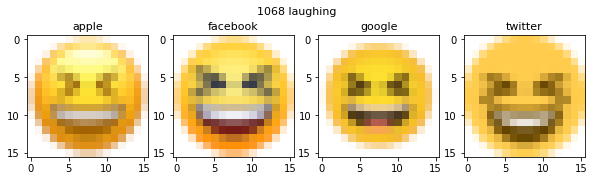

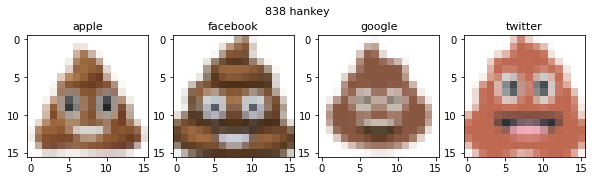

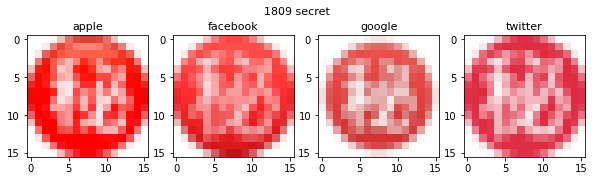

In [15]:
plot_emoji_styles(1068)
plot_emoji_styles(838)    #sorry I was provoked to try it :D
plot_emoji_styles(1809) 

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q2 &mdash; Build an emoji data set for machine learning

This question is about converting your list of four raw image sheets into a data set suitable for training with scikit-learn. 

<div style="border-bottom: 1px solid black;"></div>

### *Q2a &mdash;  Build a set of inputs $\boldsymbol{X}$ from the sheet images*

**Write code** to build a Numpy array of inputs $\boldsymbol{X}$ having dtype *float32* and shape $(N,D)$ where $N$ is the total number of emoji images (number of emojis $\times$ number of vendors) and $D$ is the total number of pixels per emoji (height $\times$ width $\times$ channels). Each image should be converted from RGBA (4 channels) to RGB (3 channels) using the *rgba_to_rgb* function defined at the top of this lab. The first rows of $\boldsymbol{X}$ should all be apple emojis, followed by all facebook emojis, then all google emojis, and finally the last rows should be all twitter emojis. <span style="color:#080;font-weight:bold"></span>

In [16]:
X = []
for style_index in range(len(vendors)):                       #iterating on all styles of four vendors
    for emoji_index  in range(len(metadata)):                 #iterating on all emojis in metadat
        emoji = get_emoji_image(style_index, emoji_index)     #getting all emojis by applying the 'get_emoji_image' function
        emoji = rgba_to_rgb(emoji).reshape(16*16*3)           #converting each emojis image from RGBA (4 channels) to RGB (3 channels) and then reshape it to (D,) 
        X.append(emoji)                                       #creating a list of emojis with shape of (N, D)      
       
X = np.array(X, dtype='float32')                              #creating a numpy array with shape (N, D)

<div style="border-bottom: 1px solid black;"></div>

### *Q2b &mdash;  Build a set of targets $\boldsymbol{y}$ from the metadata*

Here you'll enumerate the distinct emoji categories, and then build a vector of integer targets $\boldsymbol{y}$.

**Write code** to get a list of distinct emoji categories, using the *category* field from the metadata; ensure that the list of categories is displayed when the code cell below is executed.

In [17]:
categories = [emoji['category'] for emoji in metadata]    
list_set = set(categories)  
emoji_categories = list(list_set)
print(emoji_categories) 

['People & Body', 'Smileys & Emotion', 'Travel & Places', 'Activities', 'Symbols', 'Objects', 'Flags', 'Animals & Nature', 'Skin Tones', 'Food & Drink']


**Write code** to build a Numpy array of inputs $\boldsymbol{y}$ having dtype *int32* and where $y_i \in \{0, \ldots, M-1\}$ with $M$ being the number of distinct emoji categories. The order of items in $\boldsymbol{y}$ should match those of $\boldsymbol{X}$ from **Q2a**. You may use any approach you like, but potentially useful functions include the *list* object's **[index](https://docs.python.org/3/tutorial/datastructures.html)** function and Numpy's **[np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)** function.

In [18]:
#iterating on all categories that exist in each image then indexing each category based on distinct emoji categories
y = [emoji_categories.index(category) for category in categories]

y = np.tile(y, 4)                                           #reapeating the above procedure for all vendors
        
y = np.array(y,dtype='int32')                               #creating a numpy array of targets

**Write code** to demonstrate that, for each $i$ that corresponds to a '*laughing*' emoji (for apple, facebook, google, twitter), its $y_i$ label is set to be the index of the "Smileys & Emotion" category.

In [19]:
laughing_index = 1068
for i in range(0,4*len(metadata), len(metadata)):
    print(emoji_categories[y[laughing_index+i]])

Smileys & Emotion
Smileys & Emotion
Smileys & Emotion
Smileys & Emotion


<div style="border-bottom: 1px solid black;"></div>

### *Q2c &mdash;  Split and preprocess the data*

**Write code** to randomly split $(\boldsymbol{X}, \boldsymbol{y})$ into three parts, with no overlap:
1. a *training* set $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$, which you will use to directly train classifiers
2. a *validation* set $(\boldsymbol{X}_\text{val}, \boldsymbol{y}_\text{val})$, which you will use to estimate the best value for a hyperparameter
3. a *test* set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$, which you will use to evaluate final performance of the 'best' hyperparameters

The training data should comprise 60% of the full data set. The validation and testing data should each comprise 20% of the original data. Use the **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** function and remember to set *random_state*.

In [20]:
X_trn, X_fourty, y_trn, y_fourty = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=0)
X_tst, X_val, y_tst, y_val = sklearn.model_selection.train_test_split(X_fourty, y_fourty, test_size=0.5, random_state=0)

**Write code** to normalize the features of $\boldsymbol{X}_\text{trn}$, $\boldsymbol{X}_\text{val}$, and $\boldsymbol{X}_\text{tst}$, using scikit-learn's **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**. Be careful which subset of the data you use for estimating the *StandardScaler* object's *scale_* and *mean_* attributes.

In [21]:
scaler = sklearn.preprocessing.StandardScaler()
X_trn_scaled = scaler.fit(X_trn).transform(X_trn)
X_val_scaled = scaler.fit(X_val).transform(X_val)
X_tst_scaled = scaler.fit(X_tst).transform(X_tst)

**Plot a scaled and unscaled emoji side-by-side.** Choose a row from $\boldsymbol{X}_\text{trn}$ and show how it appears as an RGB image with and without scaling. If Matplotlib complains that values are not in range [0,1], consider using **[np.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)**. 

*Hint:* You do not need to know which row in $\boldsymbol{X}_\text{trn}$ corresponds to which row in $\boldsymbol{X}$. Instead you can "undo" the scaling on whatever row you pick, using one of the methods provided by *StandardScaler*.

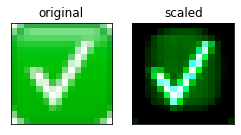

In [22]:
plt.figure(figsize=(4,10));

plt.subplot(1,2,1)
plt.title('original');
plt.imshow(X_trn[20].reshape(16,16,3))
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,2,2)
plt.imshow(np.clip(X_trn_scaled[20],0,1).reshape(16,16,3))
plt.title('scaled');
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q3 &mdash; Train classifiers and identify good hyperparameters

This question has several goals:
1. to help you visualize how hyperparameters affect training/validation/test performance.
2. to give you a sense for how long certain classifiers take to train or to make predictions.
3. to force you to try two useful Python features: (a) passing types as arguments, and (b) argument forwarding.

<div style="border-bottom: 1px solid black;"></div>

### *Q3a &mdash;  Write a function to trains multiple estimators*

Throughout **Q3**, you will be training multiple estimators, each with a different hyperparameter setting.

**Implement the *train_estimators* utility function.** The idea of this function is to make it easy to train multiple versions of an estimator where a single hyperparameter (specified by *param_name*) takes on a different value (specified by *param_vals*) for each estimator. See the docstring below.

*Hint:* For details on how Python argument forwarding works (`**kwargs`), see [this Stack Overflow answer](https://stackoverflow.com/a/36908).

In [59]:
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    """
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    
    For example:
    
       >>> train_estimators(X, y, DecisionTreeClassifier, 'max_depth', [1, 5, 10],
                            splitter='random', random_state=0)
    
       Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    
    
    # getting all keyword arguments
    kw = ""
    for arg in kwargs:
        kw += arg + "=" + (("'%s'"%(kwargs[arg])) if type(kwargs[arg])==str else str(kwargs[arg])) + ", "
    
    # building the estimators for each of the param_vals
    estimators = []
    for val in param_vals:
        string_estimator = '%s(%s=%s,%s).fit(X,y)'%(estimator_type.__name__, param_name, str(val),kw)

        # execute the string_estimator wich has a string output by applying eval()
        estimator = eval(string_estimator)
        print('Training %s...'%(str(estimator)))
        estimators.append(estimator)
        
    
    return estimators

**Run the code cell below** to test your implementation of *train_estimators*. (Replace *X_trn* and *y_trn* with whatever you called your training set variables.)

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree_estimators = train_estimators(X_trn_scaled, y_trn, DecisionTreeClassifier,
                                   'max_depth', [1, 5, 10], random_state=0, splitter='random')
tree_estimators

Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...


[DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')]

<div style="border-bottom: 1px solid black;"></div>

### *Q3b &mdash;  Train multiples models, plot their accuracies, and identify good parameters*

**Implement the *score_estimators* utility function.** This will be handy for scoring a list of estimators on a particular data set, such as $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$. Use the estimator's own *score* method.

In [61]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    return [estimator.score(X,y) for estimator in estimators]

**Run the code cell below** to test your implementation. It should print three scores per dataset. Each score is a measure of classification accuracy. (Replace *X_trn* and *y_trn* etc with your data set variables.)

In [62]:
print("train:   ", score_estimators(X_trn_scaled, y_trn, tree_estimators))
print("validate:", score_estimators(X_val_scaled, y_val, tree_estimators))
print("test:    ", score_estimators(X_tst_scaled, y_tst, tree_estimators))

train:    [0.3031767955801105, 0.5234806629834254, 0.7513812154696132]
validate: [0.3238950276243094, 0.5034530386740331, 0.505524861878453]
test:     [0.305939226519337, 0.5165745856353591, 0.42265193370165743]


**Run the code cell below** to see a demonstration of the `%%time` feature of Jupyter (see [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)). Note that `%%time` only works if it is the first line in a code cell, before comments.

In [63]:
%%time
for i in range(1000000):  # Burn some CPU cycles in a
    pass                  # loop that does nothing

Wall time: 34.9 ms


**Train multiple *DecisionTreeClassifier*s** on the training set, such that *train_estimators* produces the following output:

    Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')...

In [64]:
%%time
tree_estimators = train_estimators(X_trn_scaled, y_trn, DecisionTreeClassifier, 
                                   'max_depth', [1, 5, 10, 20, 50, 100], splitter='random', random_state=0)

Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')...
Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')...
Wall time: 1.92 s


**Implement *plot_estimator_scores*** to visualize the effect of the parameter on accuracy. When applied to the decision tree estimators you trained in the previous cell, the plot should look like below, including legend, colours, marks, and x-axis ticks, but your precise scores may differ depending on how you decided to split the data.


*Hint:* You can use your *score_estimators* implementation, but do not do any training.

*Hint:* For the title, you can get the object's type from its `__class__` attribute, and you can get the name of its type from the type's `__name__` attribute. Use the first object in *estimators* to determine the name of the classifier type that you're plotting.

*Hint:* If your $x$-axis points are not evenly spaced, you can plot each series using any evenly-spaced $x$ values (e.g. via *np.arange*) and then override the x-axis tick labels with whatever you want. See the *labels* argument of Matplotlib's **[xticks](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html)** function.

In [65]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    
    X = list(np.arange(0, len(param_vals)))
    plt.plot(X, score_estimators(X_trn_scaled, y_trn, estimators), 'go-', markersize=6, label='train')    
    plt.plot(X, score_estimators(X_val_scaled, y_val, estimators), 'ro-', markersize=6, label='validate')  
    plt.plot(X, score_estimators(X_tst_scaled, y_tst, estimators), 'k:', markersize=6, label='test')
    
    best_validation_score =  max(score_estimators(X_val_scaled, y_val, estimators))
    best_validation_param_val_index = score_estimators(X_val_scaled, y_val, estimators).index(best_validation_score)
    plt.plot(X[best_validation_param_val_index], best_validation_score, 'rx', markersize=12)  
    
    best_train_score =  max(score_estimators(X_trn_scaled, y_trn, estimators))
    best_train_param_val_index = score_estimators(X_trn_scaled, y_trn, estimators).index(best_train_score)
    
    best_test_score =  max(score_estimators(X_tst_scaled, y_tst, estimators))
    best_test_param_val_index = score_estimators(X_tst_scaled, y_tst, estimators).index(best_test_score)
    
    plt.legend(loc='upper left')
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.title('%s score vs %s'%(estimators[0].__class__.__name__,param_name))
    plt.xticks(X,param_vals)
    plt.ylim(0,1.05)

    plt.figtext(.83, .35, 'train = %.3f'%(score_estimators(X_trn_scaled, y_trn, estimators)[best_train_param_val_index]),
               {'color': 'green', 'ha': 'right', 'va': 'center'})
    plt.figtext(0.83, .28, 'validate = %.3f'%(score_estimators(X_val_scaled, y_val, estimators)[best_validation_param_val_index]),
               {'color': 'red', 'ha': 'right', 'va': 'center'})    
    plt.figtext(.83, .21, 'test = %.3f'%(score_estimators(X_tst_scaled, y_tst, estimators)[best_test_param_val_index]),
               {'color': 'black', 'ha': 'right', 'va': 'center'})

**Plot the *DecisionTreeClassifier* scores** by calling your *plot_estimator_scores* function. Your plot should look like the example plot.

Wall time: 214 ms


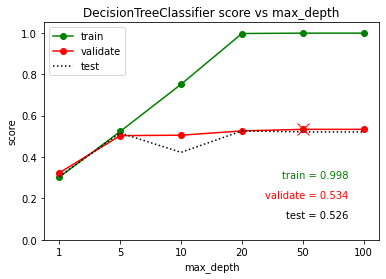

In [66]:
%%time
plot_estimator_scores(tree_estimators, 'max_depth', [1,5,10,20,50,100])

**Train multiple *RandomForestClassifiers*** such that *train_estimators* produces the following output:

    Training RandomForestClassifier(max_depth=1, random_state=0)...
    Training RandomForestClassifier(max_depth=5, random_state=0)...
    Training RandomForestClassifier(max_depth=10, random_state=0)...
    Training RandomForestClassifier(max_depth=20, random_state=0)...
    Training RandomForestClassifier(max_depth=50, random_state=0)...
    Training RandomForestClassifier(max_depth=100, random_state=0)...

In [67]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF_estimators = train_estimators(X_trn_scaled, y_trn, RandomForestClassifier,
                                   'max_depth', [1, 5, 10, 20, 50, 100], random_state=0)

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...
Wall time: 25.4 s


**Plot the *RandomForestClassifier* scores**, again by calling your *plot_estimator_scores* function.

Wall time: 4.75 s


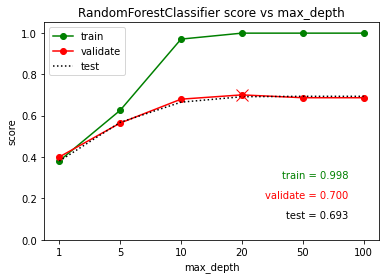

In [68]:
%%time
plot_estimator_scores(RF_estimators, 'max_depth', [1, 5, 10, 20, 50, 100])

**Train multiple *LogisticRegression* classifiers** such that *train_estimators* produces the following output:

    Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
    Training LogisticRegression(max_iter=10000, random_state=0)...
    
The omission of *C* when the final estimator was printed means it was trained with its default value, which is *C*=1. You can try it yourself:
```python
>>> LogisticRegression(C=1.01)
LogisticRegression(C=1.01)

>>> LogisticRegression(C=1.0)
LogisticRegression()
```

In [69]:
%%time
from sklearn.linear_model import LogisticRegression
LR_estimators = train_estimators(X_trn_scaled, y_trn, LogisticRegression,
                                   'C', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0], max_iter=10000, random_state=0)

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(max_iter=10000, random_state=0)...
Wall time: 27 s


**Plot the *LogisticRegression* scores**, again by calling your *plot_estimator_scores* function.

Wall time: 726 ms


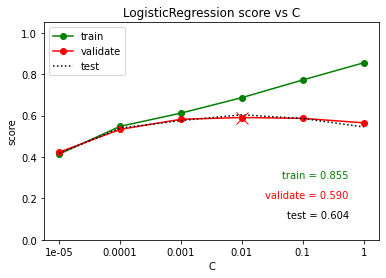

In [70]:
%%time
plot_estimator_scores(LR_estimators, 'C', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1])

**Train multiple SVM classifiers (*SVC*)** such that *train_estimators* produces the following output:

    Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=10.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=100.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=1000.0, gamma=0.001, max_iter=10000, random_state=0)...

In [71]:
%%time
from sklearn.svm import SVC
SVM_estimators = train_estimators(X_trn_scaled, y_trn, SVC,
                                   'C', [0.01, 0.1, 1.0, 10, 100, 1000], gamma=0.001, max_iter=10000, random_state=0)

Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=10, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=100, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=1000, gamma=0.001, max_iter=10000, random_state=0)...
Wall time: 1min 54s


**Plot the *SVM* scores**, again by calling your *plot_estimator_scores* function. Predictions may take several minutes to compute.

Wall time: 9min 52s


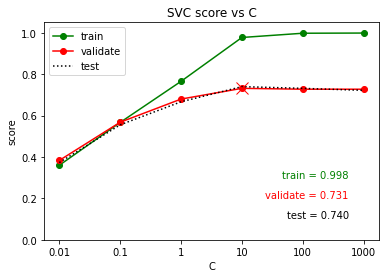

In [72]:
%%time
plot_estimator_scores(SVM_estimators, 'C', [0.01, 0.1, 1, 10, 100, 1000])

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q4 &mdash; Visualizing mistakes

The goal here is to visualize classification errors, by confusion matrix and by inspecting typical mistakes.

<div style="border-bottom: 1px solid black;"></div>

### *Q4a &mdash;  Plot a confusion matrix for the best estimators*

**Write code** to plot a confusion matrix for each of the 'best' estimators in **Q3** when applied to test set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$. Here, 'best' means best validation score. All estimators are already trained, so you can simply pull out the one best of each type {tree, forest, logistic, svm}. Use **[plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)**.

<Figure size 432x288 with 0 Axes>

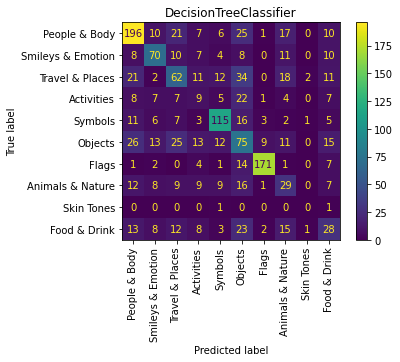

<Figure size 432x288 with 0 Axes>

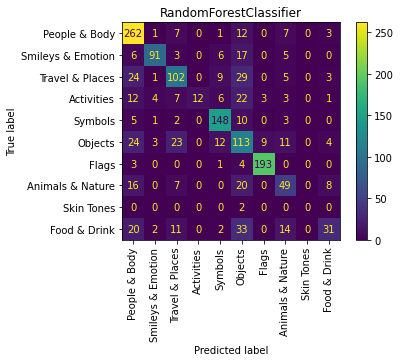

<Figure size 432x288 with 0 Axes>

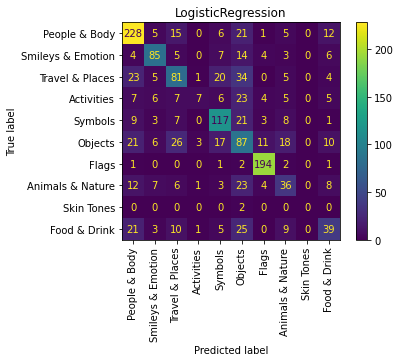

<Figure size 432x288 with 0 Axes>

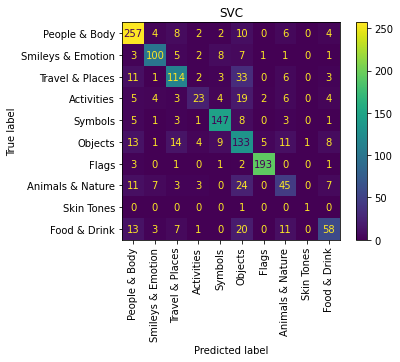

In [73]:
from sklearn.metrics import plot_confusion_matrix

# the indexes for best estimators based on previous graphs and best validation scores
best_estimators = [tree_estimators[4], RF_estimators[3], LR_estimators[3], SVM_estimators[3]]

for estimator in best_estimators:
    plt.figure()
    plot_confusion_matrix(estimator, X_tst_scaled, y_tst)
    plt.title(estimator.__class__.__name__)
    plt.xticks(np.arange(0, 10),emoji_categories, rotation = 90)
    plt.yticks(np.arange(0, 10),emoji_categories)

<div style="border-bottom: 1px solid black;"></div>

### *Q4b &mdash;  Identify specific misclassified examples*

In this question, us the "best performing" classifier that you named at the end of **Q4a**.

**Write code** to identify all "*Objects* misclassified as *Flags*" from the test-set and then plot them as images. (The phrase "*A* misclassified as *B*" means the prediction was *B* but the true class was *A*.) Your code for identifying the misclassified examples should be vectorized, for example using functions like *np.logical_and* and/or *np.nonzero*. (Remember you might need to "undo" the feature normalization like in **Q2c**).

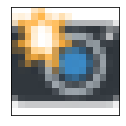

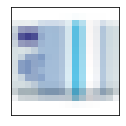

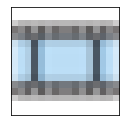

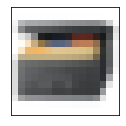

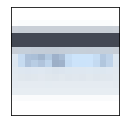

In [78]:
y_tst_predict = SVM_estimators[3].predict(X_tst_scaled)

flags_index = emoji_categories.index('Flags')
objects_index = emoji_categories.index('Objects')

indexes_obj_as_flg = np.nonzero(np.logical_not(np.logical_or(y_tst_predict - flags_index , y_tst - objects_index)))
#print(indexes_obj_as_flg)

for index in indexes_obj_as_flg[0]:
    plt.figure(figsize=(2,2))
    misclassified_emoji = X_tst[index].reshape(16,16,3)
    plt.imshow(misclassified_emoji)
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q5 &mdash; Visualizing feature importances

The goal here is to visualize sensitivity to specific input features.

<div style="border-bottom: 1px solid black;"></div>

### *Q5a &mdash;  Visualize the feature importances of a RandomForestClassifier*

**Implement *plot_random_forest_importances*** below. This function should plot the *feature_importances_* attribute of a *RandomForestClassifier* (see scikit-learn docs). For the random forests you trained, there are $16 \times 16 \times 3$ features, so to make visualization easy the feature importances should be organized into three separate side-by-side heatmaps: one for each RGB colour channel. When plotting a heatmap, use *cmap*='cool' to choose the colour map.

In [79]:
def plot_random_forest_importances(estimator):
    """
    Plots the feature importances of the given RandomForestClassifier,
    arranged as three separate 16x16 heatmaps for (red, green, blue).
    """

    feature_names = ['R', 'G', 'B']

    fi = estimator.feature_importances_.reshape(16,16,3)
   
    plt.figure(figsize=(6,2))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(fi[:,:,i], cmap='cool')
        plt.title('%s'%(feature_names[i]))
        plt.axis('off')

**Check your code** by calling your function to plot the feature importances of first *RandomForestClassifier* that you trained (with *max_depth*=1).

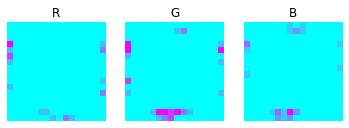

In [80]:
plot_random_forest_importances(RF_estimators[0])

**Plot the feature importances** of your 'best' *RandomForestClassifier* instance. The patterns should be more complex.

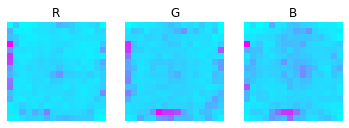

In [81]:
plot_random_forest_importances(RF_estimators[3])

<div style="border-bottom: 1px solid black;"></div>

### *Q5b &mdash;  Visualize the feature weights of LogisticRegression*

This question is essentially the same as **Q5a** except you will extract the per-class weights of a *LogisticRegression* estimator that was trained on emoji images.

**Implement *plot_logistic_weights*** so that for each of the 10 categories of emoji it plots three side-by-side images.  Use the *coef_* attribute of *LogisticRegression* to extract the $16 \times 16 \times 3$ weights for each category, and then generate a separate heatmap for each RGB channel. Since we want to see clearly which weights are positive or negative, use *cmap*='bwr' when plotting each heatmap. Use *suptitle* to label each group of heatmaps with its category label. Your function should generate $10 \times 3$ heatmaps total.

*Hint:* Note that the $i^\text{th}$ set of weights may not match the order of categories. Use the *classes_* attribute of *LogisticRegression* to recover the category index.

In [82]:
def plot_logistic_weights(estimator):
    """
    Plots heatmaps showing the weights of the LogisticRegression estimator,
    with a separate plot for each class and for each colour channel.
    """
    assert isinstance(estimator, sklearn.linear_model.LogisticRegression)
    feature_names = ['R', 'G', 'B']
    for i in range(len(emoji_categories)):
        cf = estimator.coef_[i].reshape(16, 16, 3)
        plt.figure(figsize=(6,2.4))
        for j in range(len(feature_names)):
            plt.suptitle('%s'%(emoji_categories[i]), fontsize=11)
            plt.subplot(1,3,j+1)
            plt.imshow(cf[:,:,j], cmap='bwr')
            plt.title('%s'%(feature_names[j]), fontsize=11)
            plt.axis('off')

**Check your code** by calling your function to plot the weights of the *LogisticRegression* classifier having *strongest* regularization (the one with *C*=1e-5).

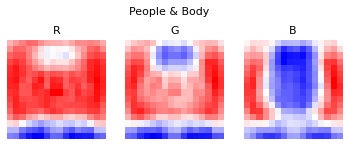

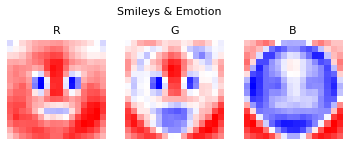

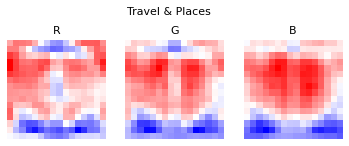

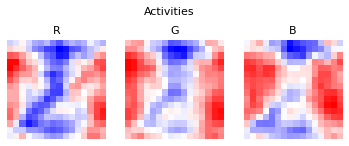

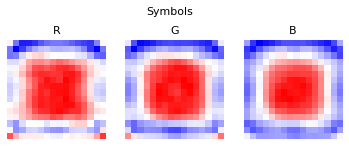

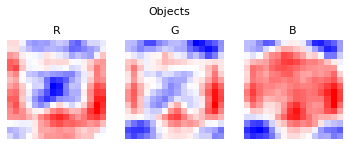

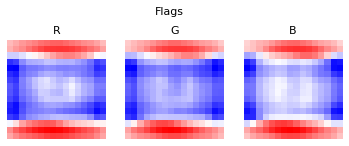

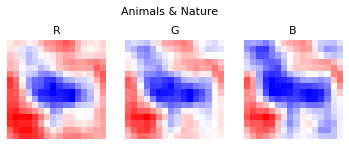

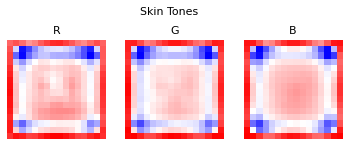

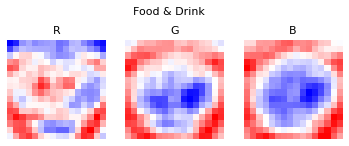

In [83]:
plot_logistic_weights(LR_estimators[0])

**Plot the weights** of your 'best' *LogisticRegression* instance.

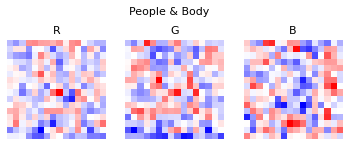

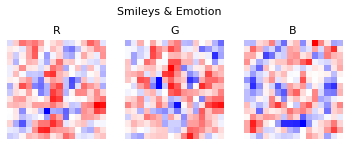

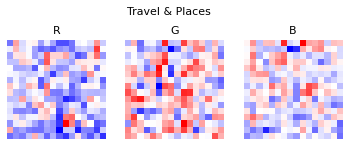

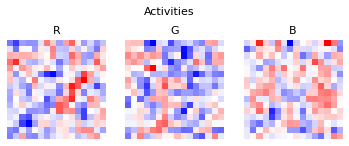

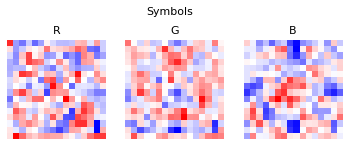

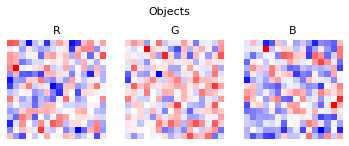

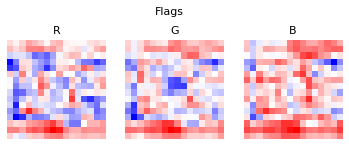

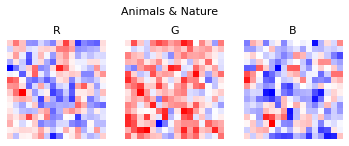

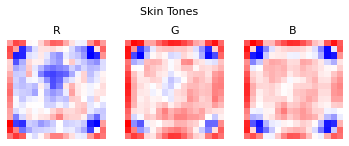

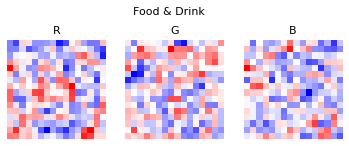

In [84]:
plot_logistic_weights(LR_estimators[3])

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q6 &mdash; Generating Python code for a tree

The goal here is to develop a deeper understanding of scikit-learn's decision tree and data structure, by generating an equivalent Python program, compiling it, and executing it. Most of the question is just learning how things work, and the part you have to do is at the very end.

**Run the code cell below**, replacing *X_trn* and *y_trn* with whatever you named your training set variables.

true: [0 5 9 6]
pred: [0 5 9 5]


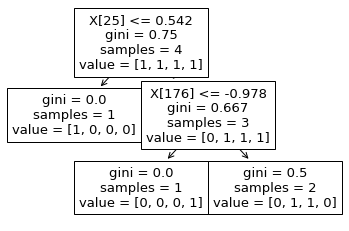

In [85]:
# Train a tiny tree on a tiny training set of only 4 instances
X_tiny = X_trn_scaled[:4]
y_tiny = y_trn[:4]
tiny_tree = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(X_tiny, y_tiny)

# Plot the tree and print the true and predicted labels
sklearn.tree.plot_tree(tiny_tree)
print("true:", y_tiny)
print("pred:", tiny_tree.predict(X_tiny))

The above is meant as a simple easy-to-understand tree, much simpler than the real ones you trained in **Q3**.

**Run the code cell below** to see a function that traverses a *DecisionTreeClassifier*'s internal tree data structure and prints a message each time it encounters a split node or a leaf node. Notice how it corresponds to the plotted tree above.

In [86]:
def print_tree(tree):
    """Prints the structure of a DecisionTreeClassifier."""
    assert isinstance(tree, sklearn.tree.DecisionTreeClassifier)

    # Shorthand for some tree attributes
    left = tree.tree_.children_left     # left[i]: index of left  node when i is a split
    right = tree.tree_.children_right   # right[i]: index of right node when i is a split
    feature = tree.tree_.feature        # feature[i]: index feature to test when i is a split
    threshold = tree.tree_.threshold    # threshold[i]: threshold to use when i is a split
    votes = tree.tree_.value            # votes[i,j]: number of training examples to reach
                                        #             node i while having class index j

    def visit_subtree(i, depth):
        indent = "  "*depth
        if left[i] != right[i]:
            print("%snode %d: split on x[%d] <= %f" % (indent, i, feature[i], threshold[i]))
            visit_subtree(left[i],  depth+1)
            visit_subtree(right[i], depth+1)
        else:
            label = tree.classes_[np.argmax(votes[i])]
            print("%snode %d: leaf label %d" % (indent, i, label))
            
    visit_subtree(0, 0)
    
print_tree(tiny_tree)

node 0: split on x[25] <= 0.541913
  node 1: leaf label 0
  node 2: split on x[176] <= -0.977530
    node 3: leaf label 9
    node 4: leaf label 5


**Call *print_tree* on your best *DecisionTreeClassifier*** from **Q3**. (The output will be very long.)

In [87]:
print_tree(tree_estimators[4])

node 0: split on x[193] <= 0.281792
  node 1: split on x[742] <= 0.773857
    node 2: split on x[532] <= -0.059167
      node 3: split on x[619] <= -0.135204
        node 4: split on x[311] <= 0.463921
          node 5: split on x[131] <= -0.630238
            node 6: split on x[686] <= -1.243356
              node 7: split on x[71] <= -0.350052
                node 8: split on x[10] <= 0.329462
                  node 9: split on x[522] <= 0.224835
                    node 10: split on x[168] <= -0.575970
                      node 11: split on x[425] <= 0.408715
                        node 12: split on x[240] <= 0.228530
                          node 13: split on x[305] <= 0.793287
                            node 14: split on x[104] <= -2.078035
                              node 15: split on x[187] <= -1.671061
                                node 16: leaf label 4
                                node 17: leaf label 8
                              node 18: leaf label 4
            

**Implement the *tree_to_code* function below.** The idea is to transform a *DecisionTreeClassifier* instance into equivalent Python code, where the code is built up as a string. 

For example, if you called it with the *tiny_tree* from earlier, it might produce a string like below (although not necessarily an identical program, depending on the training set for *tiny_tree*).

```
>>> print(tree_to_code(tiny_tree))
def predict(x):
  if x[395] <= -0.642489:
    if x[174] <= -0.988780:
      return 4
    else:
      return 7
  else:
    return 0
```

In [88]:
def tree_to_code(tree):
    """
    Given a *DecisionTreeClassifier*, returns a string that
    defines a Python function that corresponds to how the
    decision tree makes predictions. The first line of the
    string is:
    
         "def predict(x):\n..."
         
    followed by lines of code for the logic of the tree.
    """

    left = tree.tree_.children_left     # left[i]: index of left  node when i is a split
    right = tree.tree_.children_right   # right[i]: index of right node when i is a split
    feature = tree.tree_.feature        # feature[i]: index feature to test when i is a split
    threshold = tree.tree_.threshold    # threshold[i]: threshold to use when i is a split
    votes = tree.tree_.value            # votes[i,j]: number of training examples to reach
                                        #             node i while having class index j

    def visit_subtree(i, depth):
        code = "  "*(depth+1)           # defining how many tabs should be printed for each depth as indent
        if left[i] != right[i]:         # when index of left node and right node wasn't the same a split has happened in node i 
            code += "if x[%d] <= %f:\n" %(feature[i], threshold[i])       # printing the if command and add it to what we had printed so far
            code += visit_subtree(left[i],  depth+1)                      # begin with the left node and add it to what we had printed so far
            code += "  "*(depth+1) + 'else:\n'                            
            code += visit_subtree(right[i], depth+1)                      # now begin with the right node and add it to what we had printed so far
        else:                                                             # each leaf ends with an else
            label = tree.classes_[np.argmax(votes[i])]                    # defining the final label of the leaf
            code += "return %d\n" % (label)                               # and add it to what we had printed so far
        return code
            
    code = 'def predict(x):\n'                       # print the name of the function for each tree
    code += visit_subtree(0, 0)                      # executing visit subtree function for split 0 and depth 0
    return code

**Run the code cell below** to check your implementation. You should see a program equivalent to the tiny decision tree you plotted earlier.

In [89]:
print(tree_to_code(tiny_tree))

def predict(x):
  if x[25] <= 0.541913:
    return 0
  else:
    if x[176] <= -0.977530:
      return 9
    else:
      return 5



**Run the code cell below** to define a utility function called *compile_func*. What this function does is it takes a string containing a single Python function definition, and compiles it, returning a *function* object that can be called to execute the code represented by the string.

In [90]:
def compile_func(python_code):
    """
    Compiles a string defining a Python function, and returns
    a reference to the callable function object that results.
    """
    symbols = {}                             # Dictionary to collect symbols that get defined.
    exec(python_code, None, symbols)         # Execute the string as if it were code.
    assert len(symbols) == 1, "Expected python_code to define a function"
    function = next(iter(symbols.values()))  # Get reference to the object that was defined.
    assert callable(function), "Expected python_code to define a function"
    return function

**Run the code cell below** to see a demo of how *compile_func* works.

In [91]:
example_code = """
def square(x):
    return x**2
"""

example_func = compile_func(example_code)
print(example_func)

for i in range(5):
    print(example_func(i))

<function square at 0x000001F490980E50>
0
1
4
9
16


**Write code** to (a) convert your best *DecisionTreeClassifier* to a compiled Python function and (b) assert that the compiled Python function produces the same predictions on the training set $\boldsymbol{X}_\text{trn}$. (Note that your Python function expects a 1-dimensional $\boldsymbol{x}$, whereas *DecisionTreeClassifier* expects a 2-dimensional $\boldsymbol{X}$.)

In [92]:
example_func = compile_func(tree_to_code(tree_estimators[4]))

y_compile_func_predict = np.array([example_func(i) for i in X_trn_scaled])
y_trn_predict = tree_estimators[4].predict(X_trn_scaled)

assert (y_compile_func_predict == y_trn_predict).all()

**Write code to compare the prediction speed** of your *DecisionTreeClassifer* instance versus your pure-Python function. Specifically, you should use `%%time` to report the amount of time that *DecisionTreeClassifer* takes to generate predictions on the training set $\boldsymbol{X}_\text{trn}$.

In [93]:
%%time
y_trn_predict = tree_estimators[4].predict(X_trn_scaled)

Wall time: 4.99 ms


In [94]:
%%time
y_compile_func_predict = [example_func(i) for i in X_trn_scaled]

Wall time: 85.8 ms
